In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from joblib import dump

data = pd.read_csv(r'C:\Users\Hp\Downloads\data.csv')

In [8]:
data.tail()

,voc1,no2,eth,co,tag
6836,1.57,2.49,1.36,1.87,tea
6837,1.57,2.49,1.36,1.87,tea
6838,1.57,2.49,1.36,1.87,tea
6839,1.57,2.49,1.37,1.88,tea
6840,1.57,2.49,1.37,1.87,tea


In [10]:
data

,voc1,no2,eth,co,tag
0,0.43,0.70,0.23,0.83,background
1,0.43,0.70,0.23,0.83,background
2,0.43,0.69,0.23,0.83,background
3,0.43,0.69,0.23,0.83,background
4,0.43,0.69,0.23,0.83,background
...,...,...,...,...,...
6836,1.57,2.49,1.36,1.87,tea
6837,1.57,2.49,1.36,1.87,tea
6838,1.57,2.49,1.36,1.87,tea
6839,1.57,2.49,1.37,1.88,tea


In [11]:
X, y = data[['voc1','no2','eth','co']], data['tag']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

scaler_path = r'C:\Users\Hp\Downloads\scaler.pkl'
dump(scaler, scaler_path)

Accuracy: 1.0


['C:\\Users\\Hp\\Downloads\\scaler.pkl']

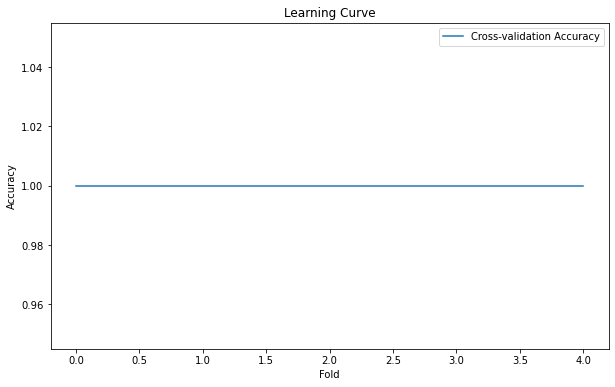

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

cv_scores = cross_val_score(model, X_train, y_train, cv=5)

plt.figure(figsize=(10, 6))
plt.plot(cv_scores, label='Cross-validation Accuracy')
plt.title('Learning Curve')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [30]:
from joblib import dump
dump(svm_model, r"C:\Users\Hp\Downloads\svm_model.joblib")

['C:\\Users\\Hp\\Downloads\\svm_model.joblib']

### Making a sample prediction

In [35]:
import numpy as np
from joblib import load

svm_model = load(r"C:\Users\Hp\Downloads\svm_model.joblib")

inputs_features = np.array([[0.57, 1.09, 0.33, 0.74]])

scaled_inputs_features = scaler.transform(inputs_features)

svm_model.fit(X_train, y_train)

predictions_features = svm_model.predict(scaled_inputs_features)

print("Predicted Labels:")
print(predictions_features)


Predicted Labels:
['background']
